This project will demonstarte the noted below regression analysis methods using the "Diabetes Data Set".
1.   Simple linear regression model
2.   Polynomial regression model
3.   Ridge regression
4.   Lasso regression


References

1. https://colab.research.google.com/drive/1AbzEMBcgrGMhdgBlLW2J5uQUhONaDavj#scrollTo=uC8SI5FhWa8o
2. https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
4. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html





 The following Python libraries are used:
    
*   Pandas for managing the data
*   numpy for mathematical analysis
*   seaborn for data visualization
*   matplotlib for data visualization
*   Scikit learn for machine learning


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# Load diabets data set
from sklearn.datasets import load_diabetes

In [90]:
import sklearn; print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.5.2


In [91]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [92]:
# Load the diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

**Diabetes dataset**
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
**Data Set Characteristics**:
Number of Instances: 442
Number of Attributes: First 10 columns are numeric predictive values
Target: Column 11 is a quantitative measure of disease progression one year after baseline
**Attribute Information:**

        age: age in years
        sex
        bmi: body mass index
        bp: average blood pressure
        s1: tc, total serum cholesterol
        s2: ldl, low-density lipoproteins
        s3: hdl, high-density lipoproteins
        s4: tch, total cholesterol / HDL
        s5: ltg, possibly log of serum triglycerides level
        s6: glu, blood sugar level
Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).
Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
For more information see: Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


**Data Cleaning and Wrangling**

**Use pandas for inspecting and viewing the data**

In [93]:
# Convert to data to DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['target'])

In [94]:
#Check the dimensions of the dataset
print(df.shape)

(442, 11)


In [95]:
# Examine the data set
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [96]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [98]:
# Get the data columns
columns = list(df.columns)
print(columns)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


In [99]:
# Check datatype in each column
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [100]:
# Examining missing values
print("Missing values distribution check: ")
print(df.isnull().mean())
print("")

Missing values distribution check: 
age       0.0
sex       0.0
bmi       0.0
bp        0.0
s1        0.0
s2        0.0
s3        0.0
s4        0.0
s5        0.0
s6        0.0
target    0.0
dtype: float64



In [101]:
# Number of unique values in each variable
print(df.nunique())

age        58
sex         2
bmi       163
bp        100
s1        141
s2        302
s3         63
s4         66
s5        184
s6         56
target    214
dtype: int64


**Check the data for the following:**
1. Duplicates
2. Zeros
3. Outliers

In [102]:
# Check for duplicate values in the dataset
print(df.duplicated().sum())

0


In [103]:
# Checking for zeroes in the dataset
(df[df.columns] == 0).sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


**Visualize Data**

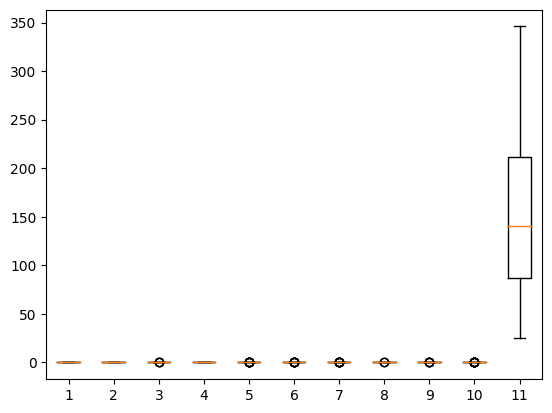

In [105]:
plt.boxplot(df);

In [106]:
# If the data has outliers use this code to treat the ouliers
# Treat outliers in the data set
#def outlier_treatment():
#    l = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6","target"]
#    for i in l:
#       x = np.quantile(df[i],[0.25,0.75])
#       iqr = x[1]-x[0]
#       uw = x[1]+1.5*iqr
#       lw = x[0]-1.5*iqr
#       df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))

#outlier_treatment()
pass

In [107]:
# Plot data after outlier treatment
# plt.boxplot(df);
pass

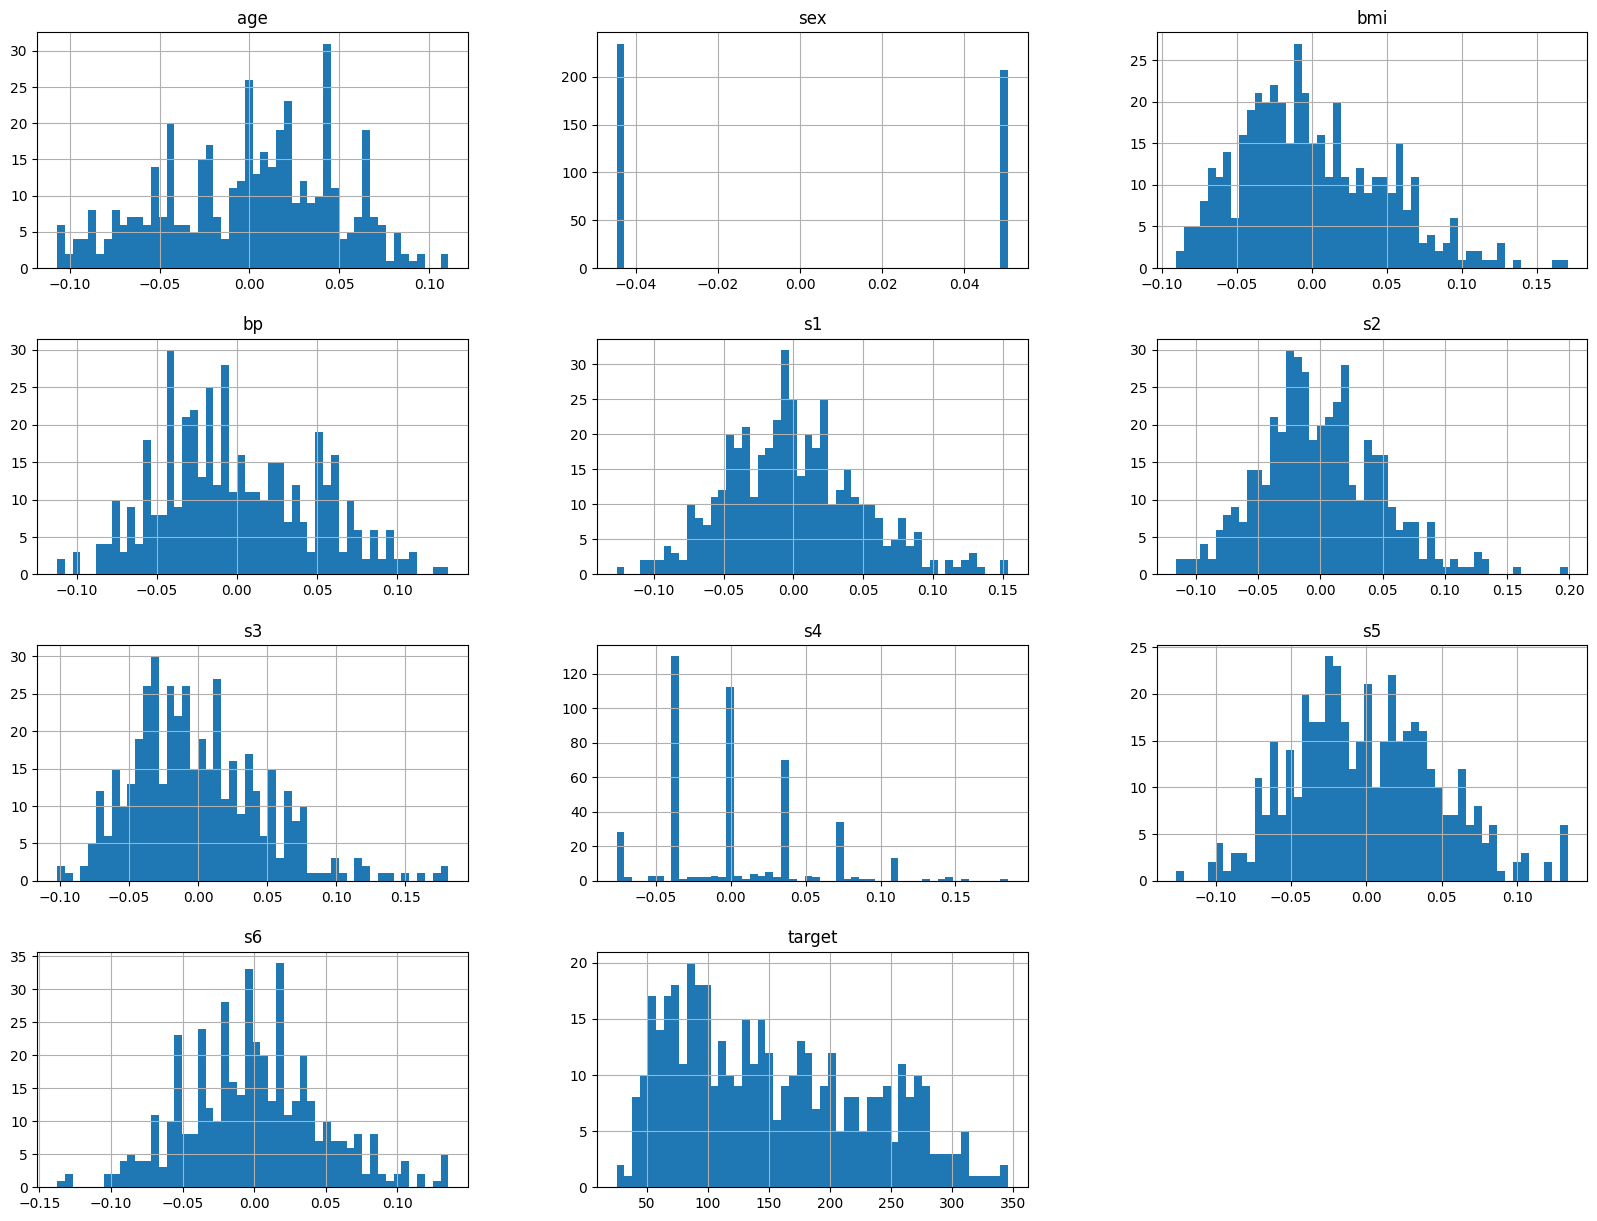

In [108]:
# data visualization
df.hist(bins=50, figsize=(20,15));

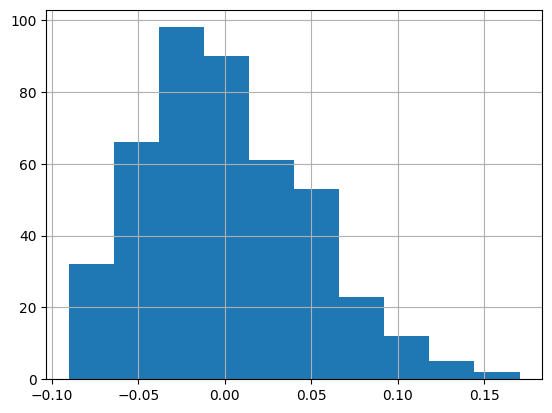

In [109]:
# Print selected histogrmas
df['bmi'].hist();

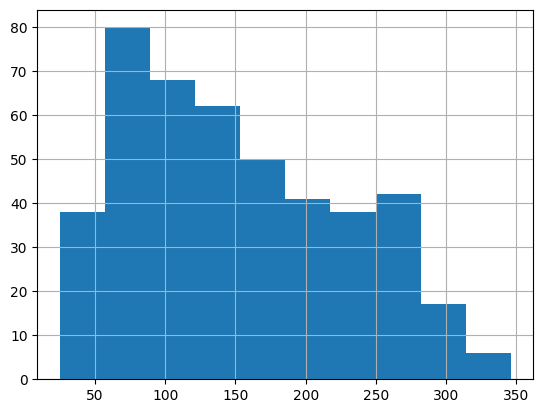

In [110]:
df['target'].hist();

Text(0.5, 1.0, 'correlation of feature')

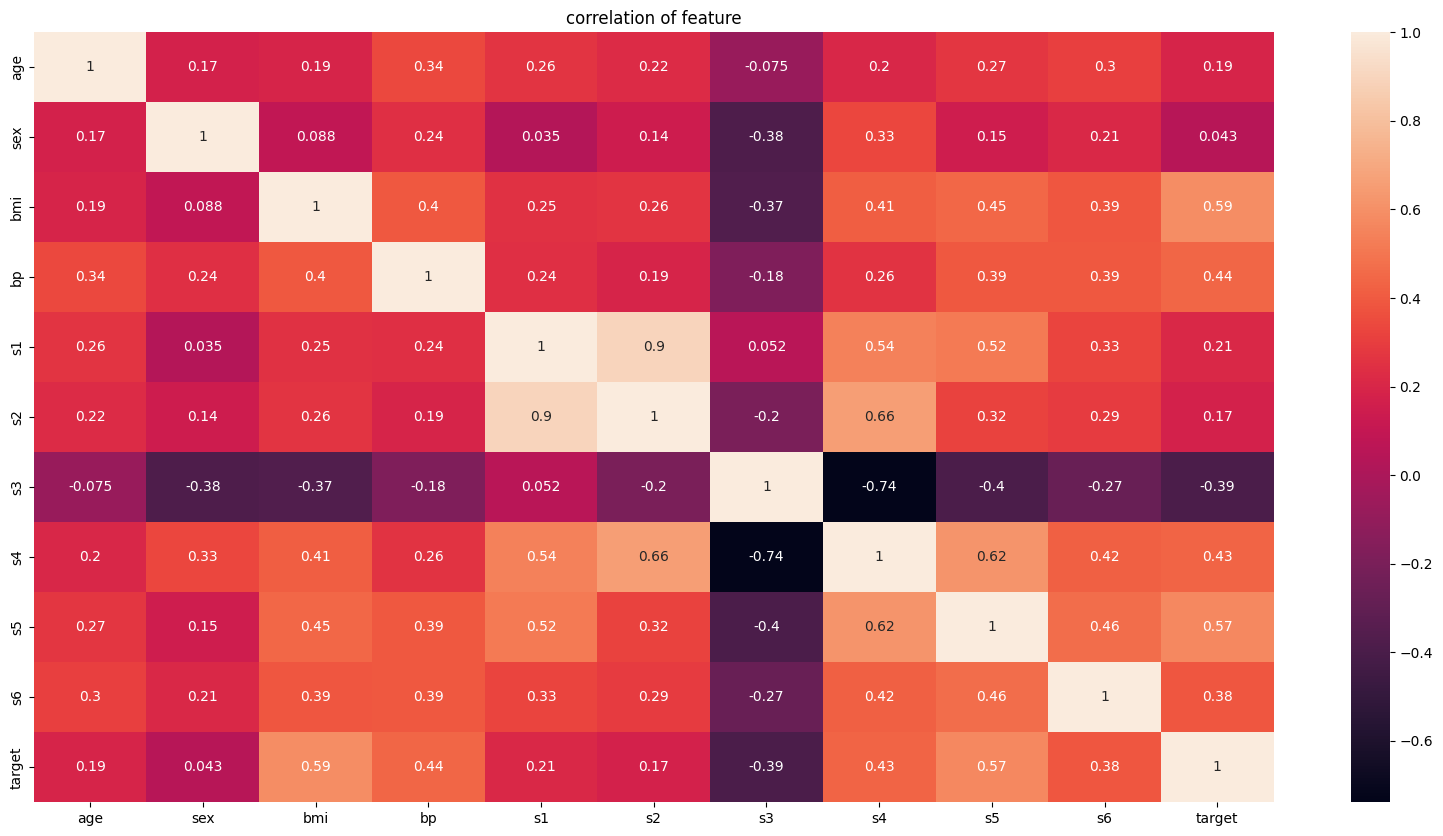

In [111]:
# Generate heatmap of correlations
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

In [112]:
# Check correlation between different variables
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [113]:
# Sort correlation of output variable with other variables in decreasing order
df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


The calculated Ratios of Correlation suggest that the predominant factors are
bmi (body mass index), s5 (log serum of triglycerides), bp (average blood pressure) and s4 (total cholesterol). And the less significant factors are s3 (high-density lipoproteins) and sex.
Thus, it can be concluded that diabetic patients need to keep their weight, triglycerides, cholesterol and blood pressure in check.


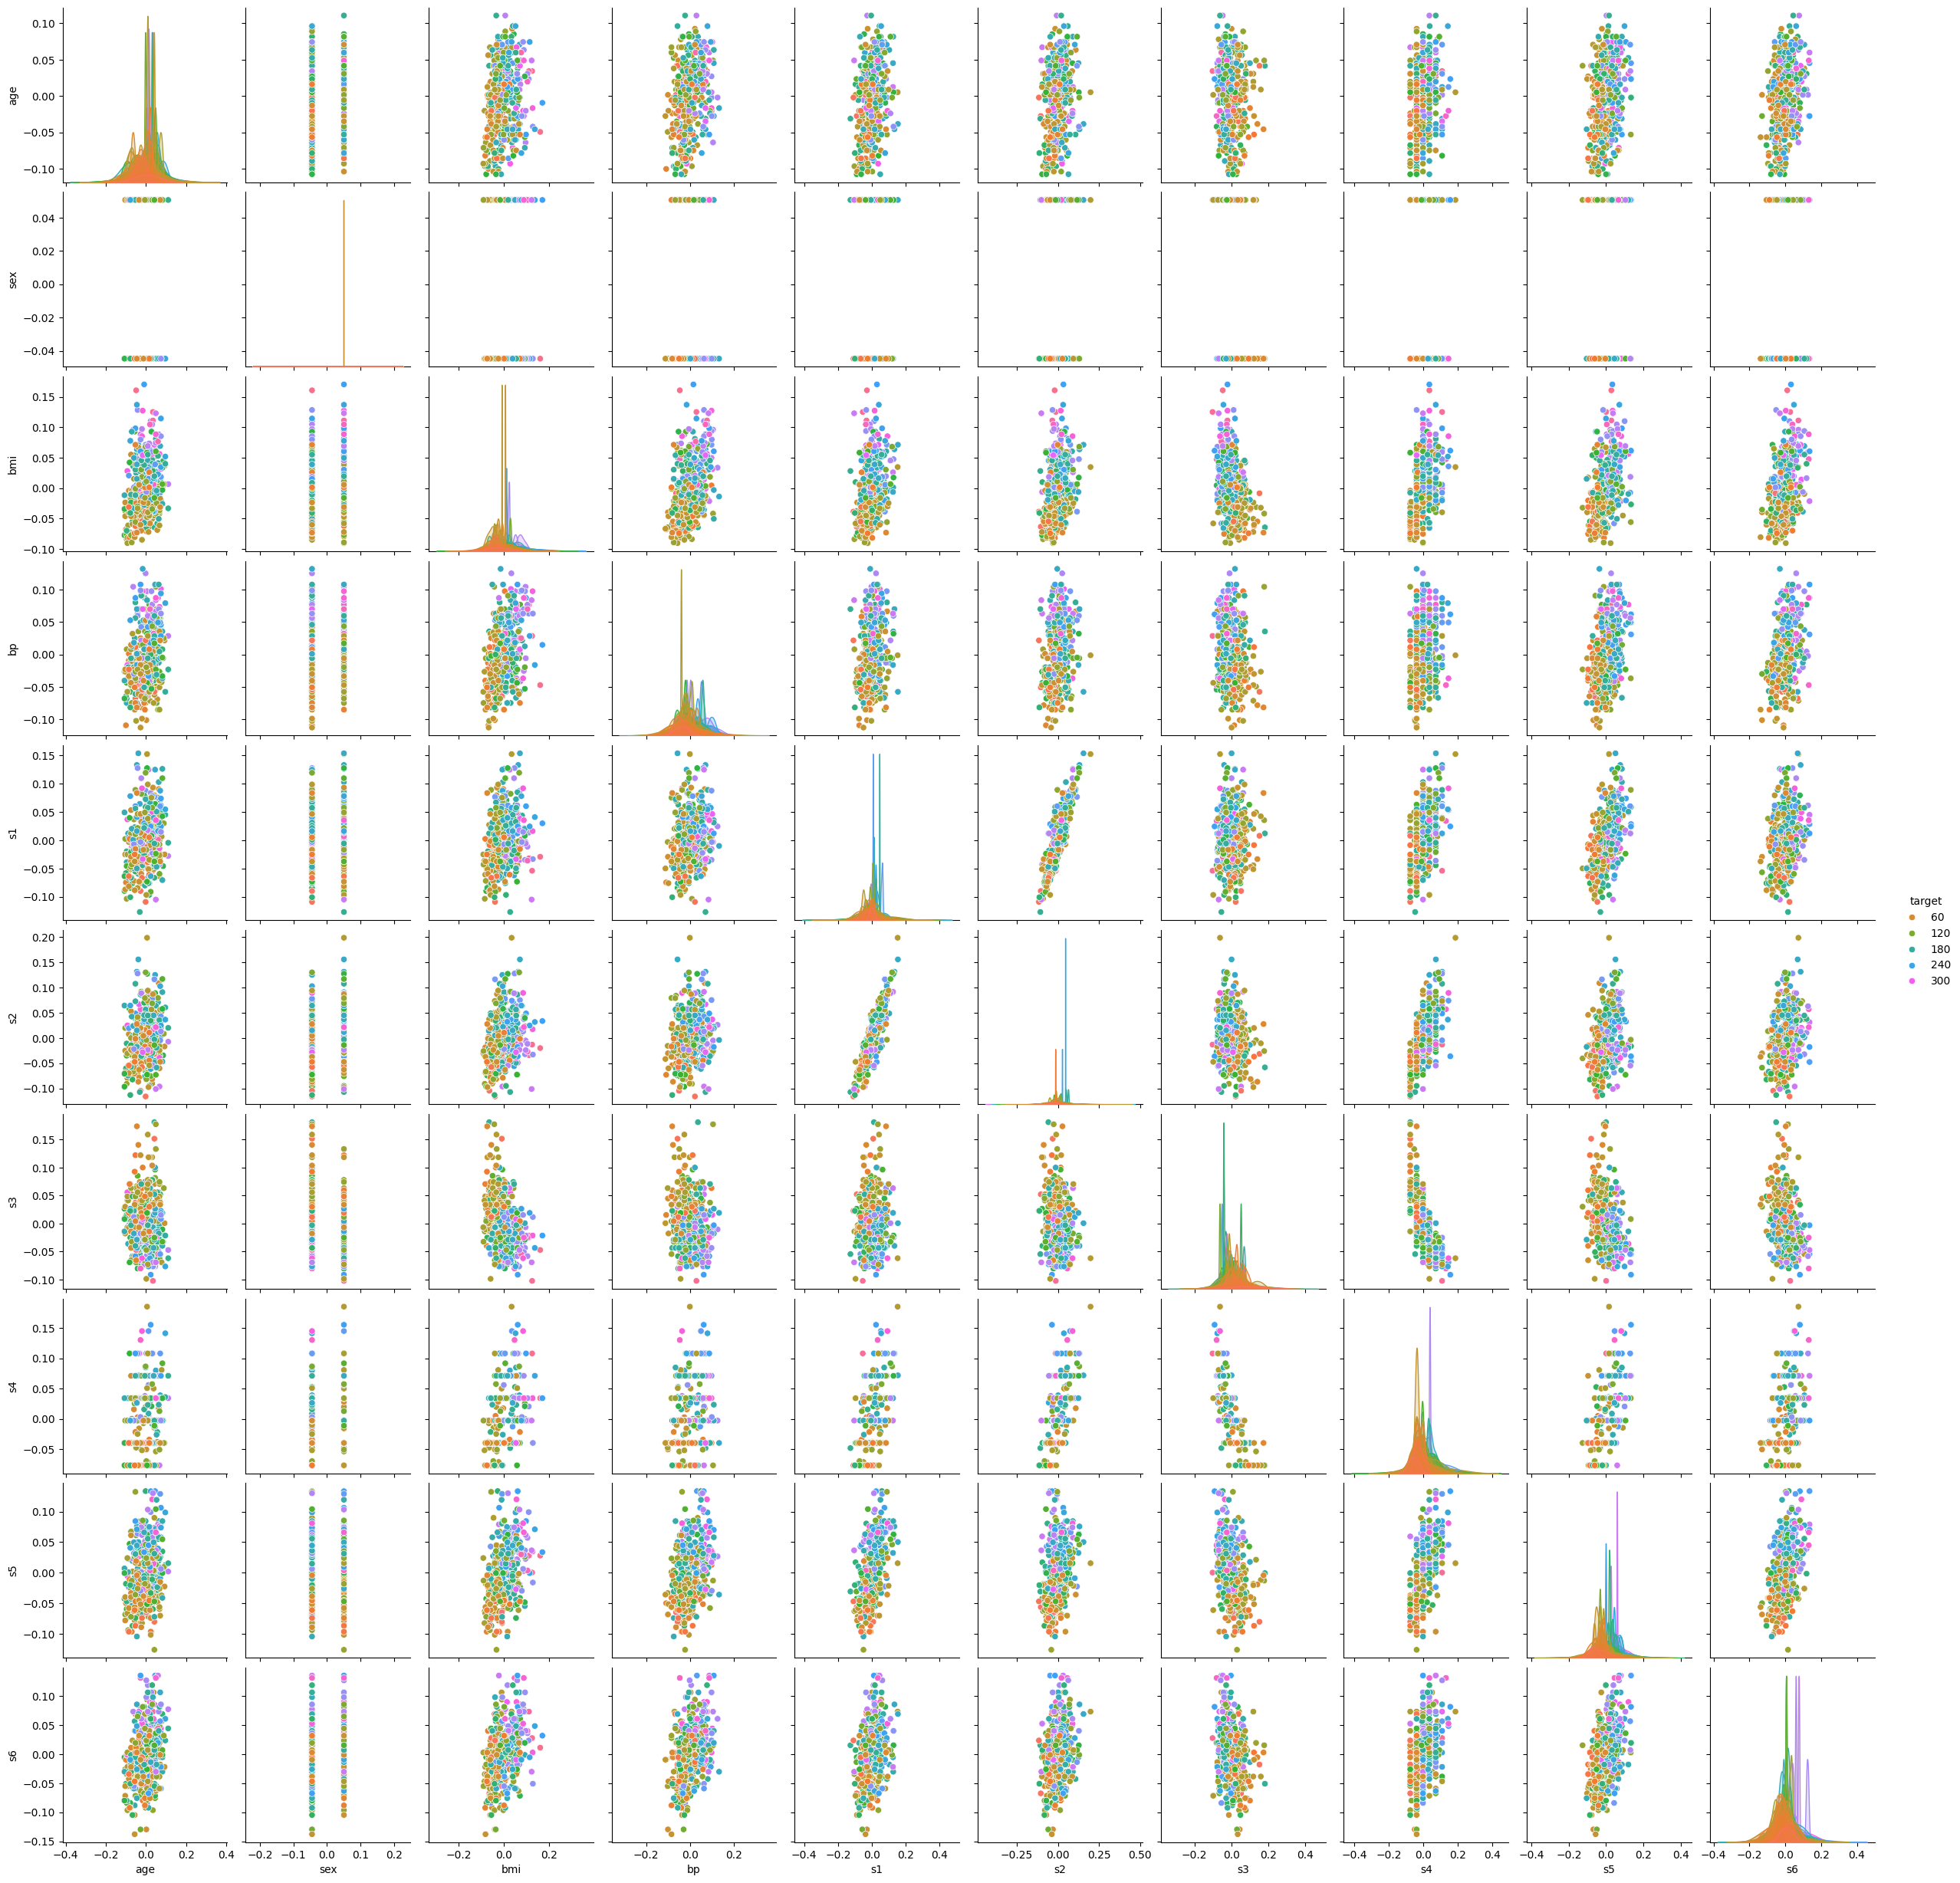

In [114]:
# Pairplot of dataset - variables relation with Target
sns.pairplot(df, hue='target', palette="husl")

In [115]:
# Split the data into training and testing sets
# We split our data into training and testing sets, using 30% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print coefficients
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


**Simple Linear Regression Model**

In [116]:
# Create and fit the Simple Linear Regression Model (SLM)
slm = LinearRegression()
reg=slm.fit(X_train, y_train)
print("Simple Linear Regression")
# Return coefficient of determination
print("Coff. of Determination=", reg.score(X,y))
# Make predictions on training and testing data
y_train_pred_slr = slm.predict(X_train)
y_test_pred_slr = slm.predict(X_test)
# Linear regression coefficients
print("SLM coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Simple Linear Regression
Coff. of Determination= 0.5120874629222862
SLM coefficients: [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
Intercept: 151.00821291456543


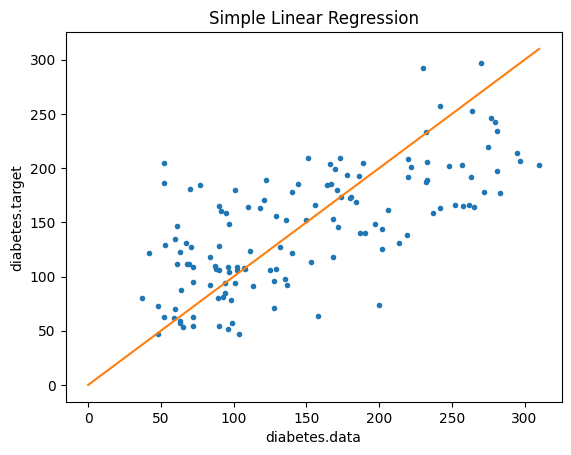

In [117]:
# plot prediction and actual data
plt.plot(y_test, y_test_pred_slr, '.')
# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 310, 140)
y = x
plt.xlabel('diabetes.data')
plt.ylabel('diabetes.target')
plt.plot(x, y)
plt.title("Simple Linear Regression")
plt.show()

In [118]:
# Calculate R-squared and mean squared error for evaluation
slr_r2_train = r2_score(y_train, y_train_pred_slr)
slr_r2_test = r2_score(y_test, y_test_pred_slr)
slr_mse_train = mean_squared_error(y_train, y_train_pred_slr)
slr_mse_test = mean_squared_error(y_test, y_test_pred_slr)

# print values
print(f"Simple Linear Regression")
print(f"Training R-squared= {slr_r2_train:.3f}, Training MSE= {slr_mse_train:.3f}")
print(f"Testing R-squared= {slr_r2_test:.3f}, Testing MSE= {slr_mse_test:.3f}")


Simple Linear Regression
Training R-squared= 0.524, Training MSE= 2924.046
Testing R-squared= 0.477, Testing MSE= 2821.751


**Standardize the Data**

We standardize features by removing the mean and scaling to unit variance using StandardScaler, we create a StandardScaler object:

In [119]:
ss=StandardScaler()
ss

StandardScaler()

In [120]:
X_train=ss.fit_transform(X_train)

In [121]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [122]:
X_test=ss.transform(X_test)
lm_predictions = lm.predict(X_test)
lm_predictions

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

In [123]:
mse = mean_squared_error(y_test, lm_predictions)
mse

2821.750981001311

**Polynomial Regression Model**

In [124]:

# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []
from sklearn.preprocessing import PolynomialFeatures
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    print(X_train_poly.shape)
    print(X_test_poly.shape)
    model = LinearRegression()
    model.fit(X_train_poly,y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Linear Regression:")
print("coefficients:", reg.coef_)
print(f"Best Degree: {best_degree}")
print('Original feature:', X[0])
print('polynomial features',X_train_poly[0])


(309, 66)
(133, 66)
(309, 286)
(133, 286)
(309, 1001)
(133, 1001)

Polynomial Linear Regression:
coefficients: [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
Best Degree: 2
Original feature: [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
polynomial features [ 1.00000000e+00  6.42054387e-01  1.05661647e+00 ...  1.27249268e-07
 -2.78963401e-11  6.11560134e-15]


In [125]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [126]:
print("R^2 on training data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training data: 0.6081125473283024
R^2 on testing data: 0.4129801955855271


In [127]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

In [128]:
param_grid = {
    "polynomial__degree": [1, 2, 3,4],


}

In [129]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [130]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [131]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3, 4]})

In [132]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [133]:
best.score(X_test,y_test)

0.5476738367363417

In [134]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [135]:
best.score(X_test,y_test)

0.5476738367363417

**Ridge Regression**

In [136]:
rr = Ridge(alpha=0.01)
rr

Ridge(alpha=0.01)

In [137]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [138]:
rr.predict(X_test)

array([138.47403445, 181.10754957, 125.36772871, 292.76747315,
       123.87476762,  91.90553453, 257.26081231, 177.78438511,
        84.96104475, 109.17002061,  94.48935894, 166.10686754,
        57.44609511, 206.13372813,  97.77753844, 131.01206777,
       214.30711792, 252.5142343 , 199.66425019, 219.48510536,
       203.23380733,  88.00888864,  70.65957889, 186.91999104,
       155.81816391, 162.82114063, 191.93695798, 184.71494252,
        46.63745826, 108.27327555, 178.17036317,  91.36961045,
       127.71679948, 184.02680843, 172.23682129, 189.51811984,
       121.82552947, 117.74750497, 145.67134538,  58.58446103,
        72.56760199, 107.27873857, 166.13815764, 153.27322681,
       165.20710591,  62.97461971,  73.61565603, 110.0282609 ,
        54.52389351, 164.8638078 , 152.51281108,  63.89631073,
       111.47603156, 108.34620604, 179.94582663, 158.72133135,
        95.0493813 , 209.67846606, 118.36505918,  69.66861261,
       189.03395955, 204.97480505, 140.27369972, 105.75

In [139]:
print("R^2 on training data ",rr.score(X_train, y_train))
print("R^2 on testing data ",rr.score(X_test,y_test))

R^2 on training data  0.5244123802151588
R^2 on testing data  0.4772966909581785


In [140]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)

Ridge(alpha=1)

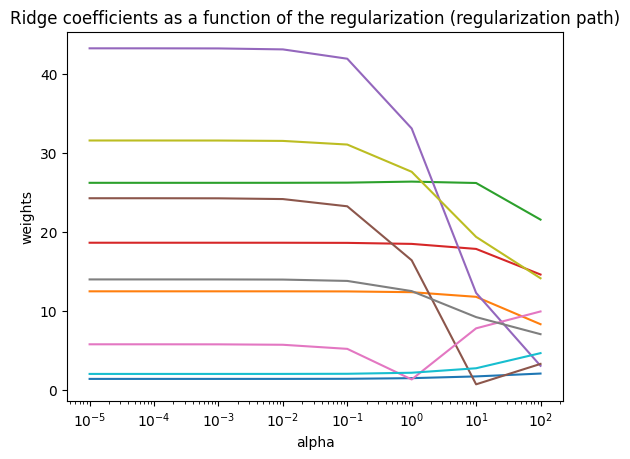

In [141]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2=[]
coefs = []
for alpha in alphas:
 ridge = Ridge(alpha=alpha)
 ridge.fit(X_train, y_train)
 coefs.append(abs(ridge.coef_))
 R_2.append(ridge.score(X_test,y_test))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()

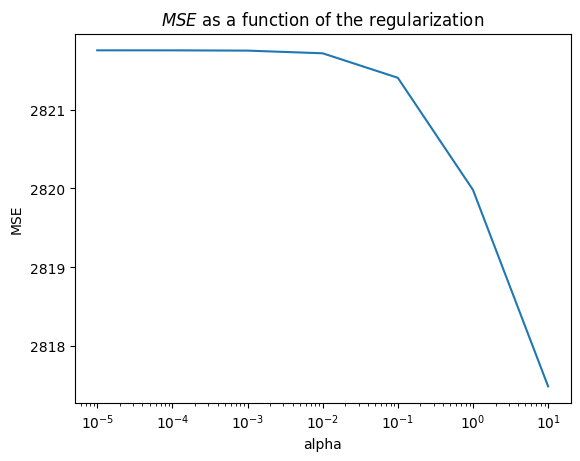

In [142]:
# Enter your code and run the cell
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
MEAN_SQE=[]
for alpha in alphas:
 ridge = Ridge(alpha=alpha)
 ridge.fit(X_train, y_train)
 MEAN_SQE.append(mean_squared_error(ridge.predict(X_test),y_test))
ax = plt.gca()
ax.plot(alphas, MEAN_SQE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("$MSE$ as a function of the regularization")
plt.show()

In [143]:
pipe.fit(X_train, y_train)
predicted=pipe.predict(X_test)
pipe.score(X_test, y_test)

0.4130963800411308

**Lasso Regression**

In [144]:
la = Lasso(alpha=0.1)
la.fit(X_train,y_train)
la

Lasso(alpha=0.1)

In [145]:
predicted = la.predict(X_test)
predicted

array([138.91848668, 181.65392307, 127.92770717, 292.65167159,
       123.14425703,  92.475499  , 257.12820997, 180.28319489,
        83.05316211, 110.439786  ,  94.96428459, 163.90754859,
        61.13350001, 205.65037865,  97.56121837, 131.78458297,
       215.1847355 , 250.8302957 , 199.64855386, 218.02240948,
       203.33123306,  88.13858671,  71.11150509, 186.89650996,
       156.51751168, 163.85192486, 192.58545757, 183.28810996,
        47.40528909, 109.16117509, 180.06531315,  93.09721618,
       127.6635132 , 182.62730667, 171.87131381, 190.40797073,
       121.37836879, 117.36056012, 144.75291624,  59.20115256,
        73.39613185, 107.4136018 , 164.97819346, 150.97671411,
       166.53731729,  64.42134284,  76.10524889, 107.01275064,
        56.834816  , 162.69916248, 154.27183161,  65.04538967,
       114.92183135, 107.84118749, 177.80136675, 160.70859303,
        94.96593083, 208.83886182, 117.7744257 ,  66.57936303,
       187.75555145, 203.62217604, 140.98318079, 105.70

In [146]:
print("R^2 on training data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training data  0.5244124363545944
R^2 on testing data  0.4772897164322617


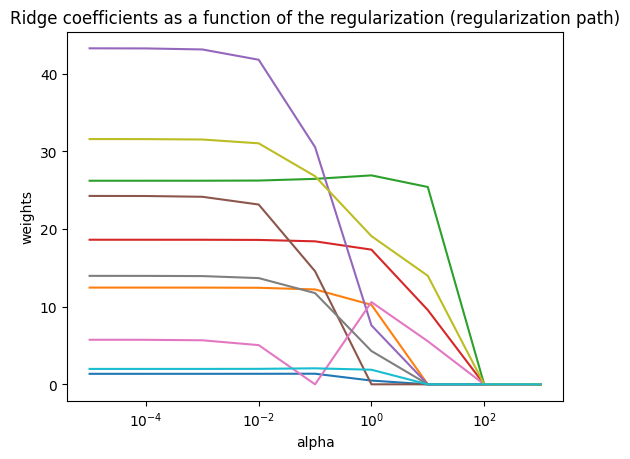

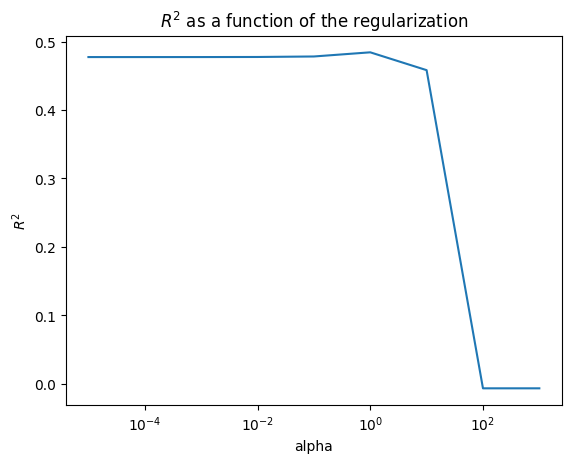

In [147]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)

    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

**Pipe Line**

In [148]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe = Pipeline(Input)

In [149]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([139.80695261, 196.61365752, 152.69837206, 323.00188064,
       113.29977414,  94.06232822, 288.51480466, 195.10700105,
        46.34362792, 104.92789024,  96.08321004, 145.25824668,
        86.12440779, 205.35175991,  65.58693536, 112.24743773,
       246.57732934, 303.10260433, 175.29086426, 246.99427066,
       190.12473508,  74.14021864,  62.78735365, 210.48215489,
       165.2010873 , 180.31027119, 225.46499148, 186.39770196,
        54.28144571, 107.41915526, 186.57804468, 113.77643938,
       115.00281105, 172.09371337, 169.18120303, 189.51549845,
       102.55819878, 103.4666871 , 153.47974075,  53.81128974,
        50.3395881 , 125.18207357, 173.9146493 , 162.21374049,
       150.37626737,  73.07474596, 102.79377728,  77.71312701,
        52.87017444, 148.61544103, 155.56123212,  96.24930789,
       124.48247853,  89.61655392, 146.74590429, 180.37137679,
        86.60243074, 224.49363045, 113.40003406,  60.74006042,
       182.9130567 , 193.12910771, 136.74831053,  91.10

In [150]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.550279824080419
R^2 on testing data  0.4519709150362462
